# Comparative Study of ML Models
Compare the performance of machine learning models for regression data set (eg. UCI repository Breast Cancer dataset) for the data partition of 70-30% with acceptable error of ±100.

### Importing Required Packages and Importing Dataset

In [1]:
#import required packages
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

sns.set()

In [2]:
#import required dataset into pandas dataframe
data = sns.load_dataset('diamonds')

In [3]:
#printing dataset shape
print("Dataset Shape : ", data.shape)
#printing dataset observations
data.head()

Dataset Shape :  (53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#obtaining information on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Data Preprocessing and EDA

In [6]:
data['cut'] = data['cut'].astype('str')
data['color'] = data['color'].astype('str')
data['clarity'] = data['clarity'].astype('str')

**Duplicate Values**

In [7]:
#obtain information on unique values in each column
data.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [8]:
#check if there exist and duplicate values
data.duplicated().any()

True

In [9]:
#find out number of duplicate values
data.duplicated().sum()

146

In [10]:
print("Dataset Shape before: ", data.shape)
data.drop_duplicates(inplace=True)
print("Dataset Shape after: ", data.shape)

Dataset Shape before:  (53940, 10)
Dataset Shape after:  (53794, 10)


**Outliers**

In [11]:
data['price_z_score'] = np.abs(stats.zscore(data['price']))

In [12]:
data = data[data['price_z_score']<=3]

In [13]:
data.drop('price_z_score', axis=1, inplace=True)

**Label Encoding**

In [14]:
label_encoder = preprocessing.LabelEncoder()

In [15]:
data['cut']= label_encoder.fit_transform(data['cut'])
data['color']= label_encoder.fit_transform(data['color'])
data['clarity']= label_encoder.fit_transform(data['clarity'])

In [16]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


**View Data**

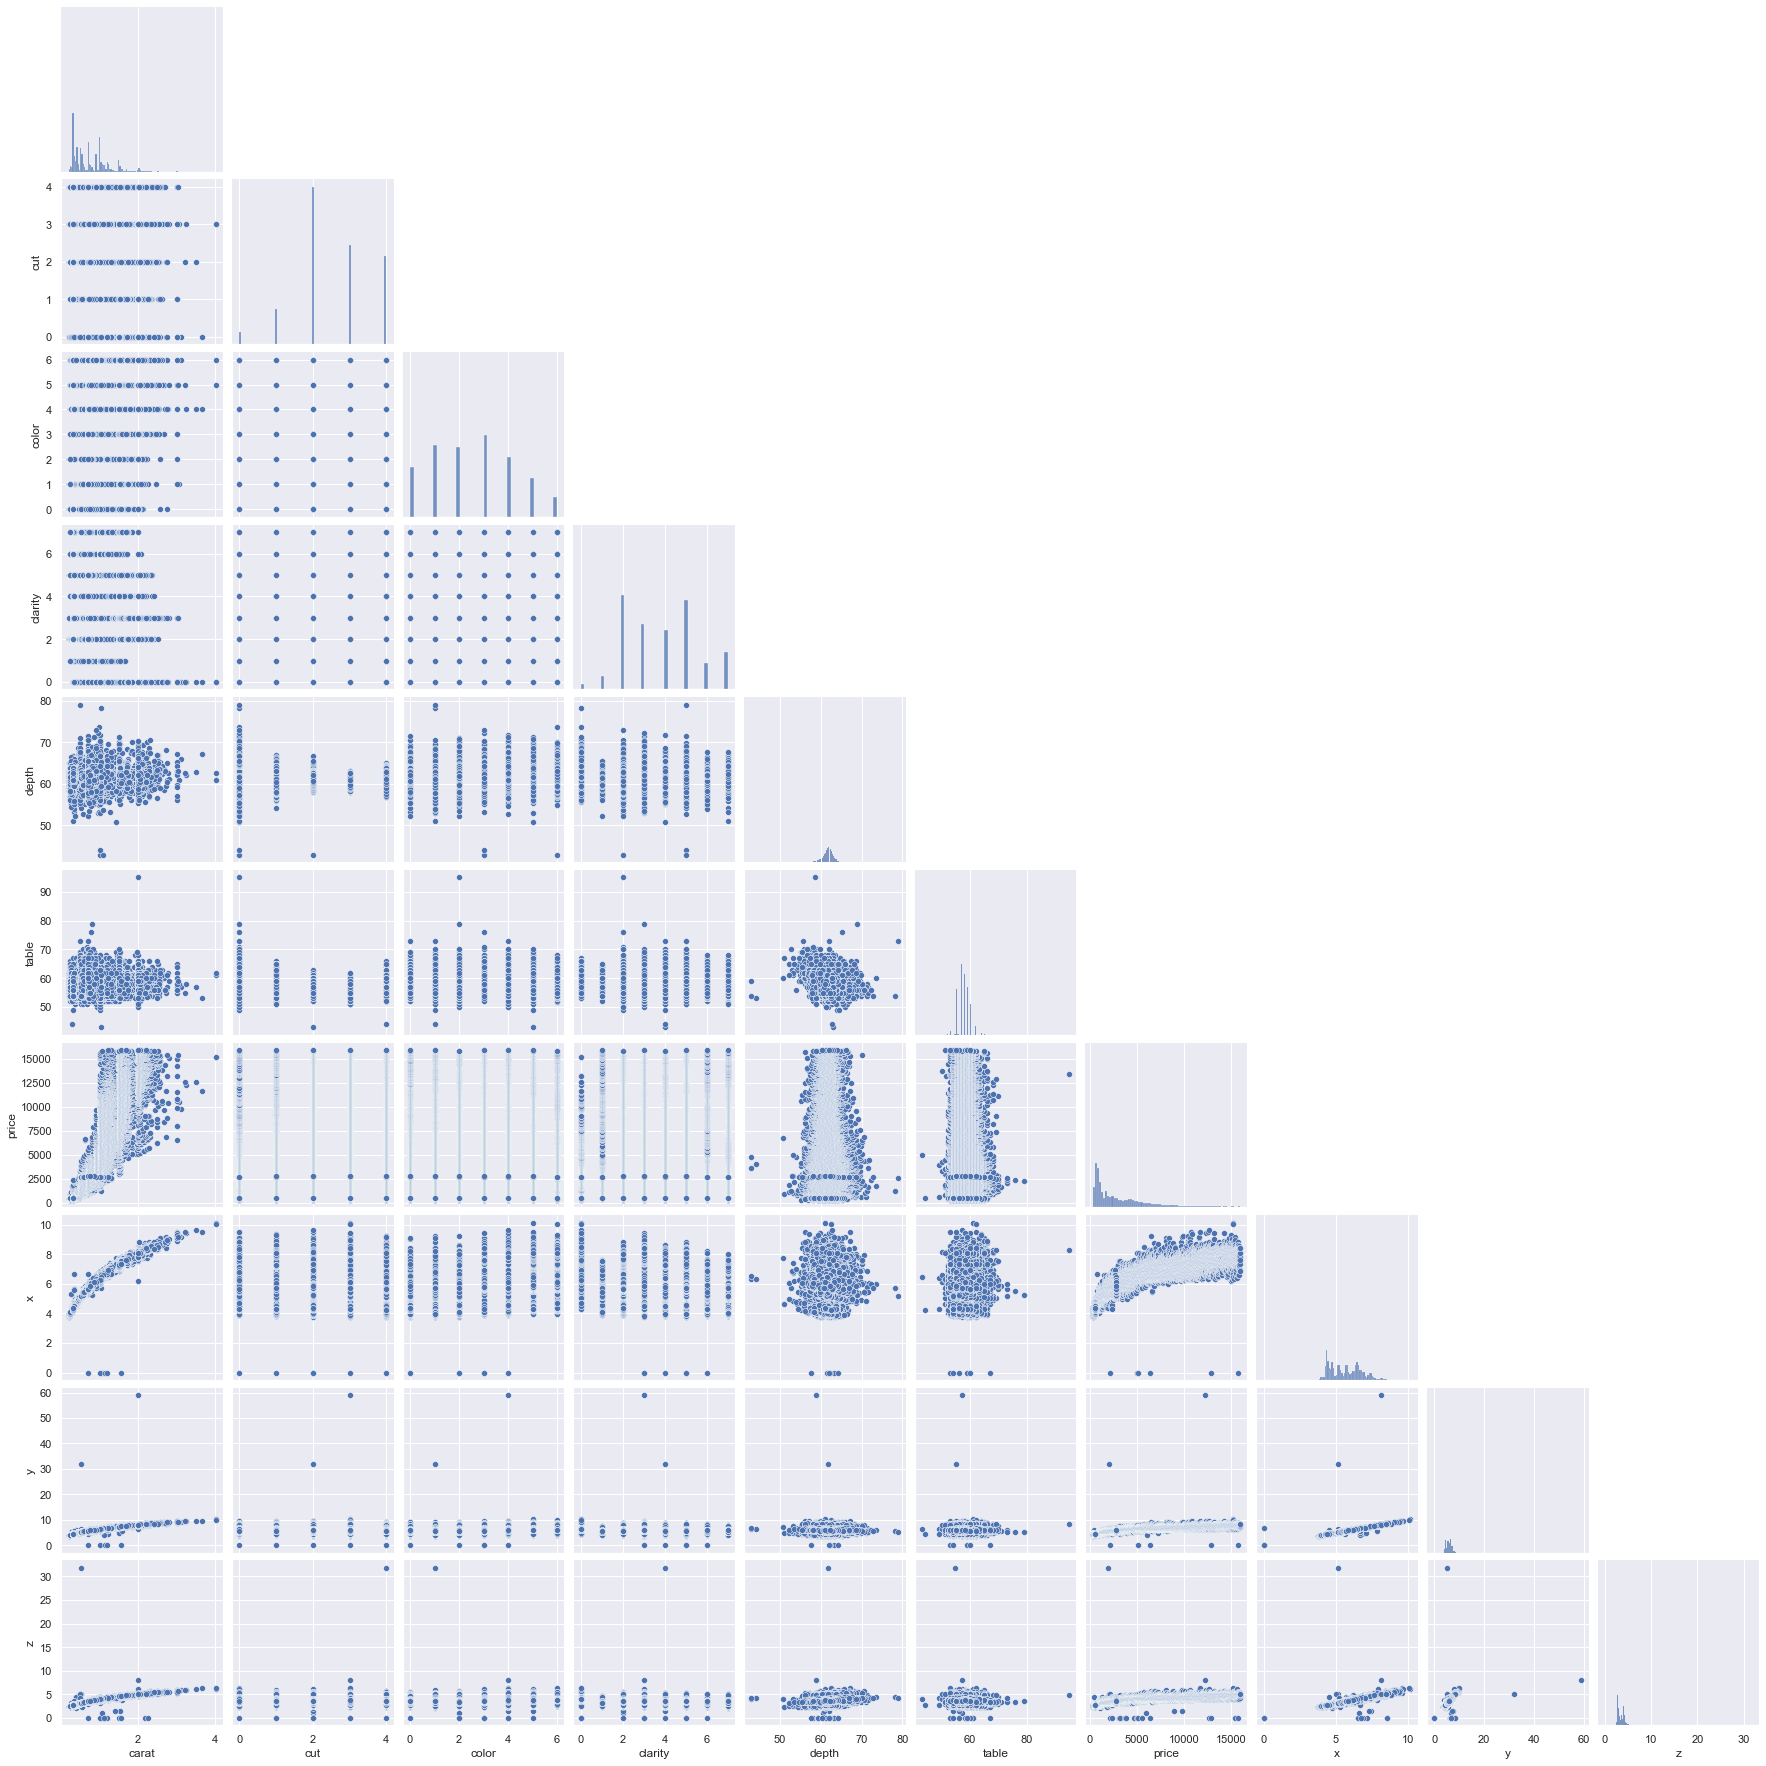

In [17]:
sns.pairplot(data, corner=True)

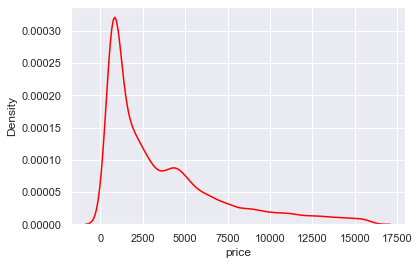

In [18]:
sns.kdeplot(data['price'], color='Red')

**Normalization**

In [19]:
sc=StandardScaler()

In [20]:
col_names = data.columns

data = sc.fit_transform(data)

data= pd.DataFrame(data)
data.columns = col_names

In [21]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.232637,-0.535460,-0.928860,-0.487458,-0.177004,-1.094535,-0.949706,-1.610709,-1.553511,-1.590646
1,-1.278290,0.436630,-0.928860,-1.065281,-1.367590,1.591392,-0.949706,-1.666642,-1.681333,-1.767965
2,-1.232637,-1.507551,-0.928860,0.090366,-3.398590,3.382009,-0.949418,-1.517486,-1.471339,-1.767965
3,-1.095680,0.436630,1.426254,0.668189,0.453306,0.248428,-0.947405,-1.377652,-1.325256,-1.295116
4,-1.050028,-1.507551,2.015032,-0.487458,1.083616,0.248428,-0.947117,-1.247140,-1.215695,-1.117798


**Train Test Split**

In [22]:
#Separating the dependent and independent variable
X = data.drop('price', axis=1)
Y = data['price']

#Splitting the dataset into test data and train data
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=1)

### Machine Learning Models

In [23]:
df = pd.DataFrame(columns= ['Model', 'RMSE', 'R Square'])

**Linear Regression**

In [24]:
#create the regression object and fit the train set
linear_reg = LinearRegression().fit(x_train, y_train)

#predict the values for test data
price_predict_reg = linear_reg.predict(x_test)

In [25]:
#view results for the model
print('RMSE :', round(np.sqrt(mean_squared_error(y_test, price_predict_reg)),5))
print("R^2 : ", round(r2_score(y_true=y_test,y_pred=price_predict_reg),5))

RMSE : 0.34503
R^2 :  0.87909


In [26]:
df = df.append({'Model':'Linear Regression', 'RMSE':round(np.sqrt(mean_squared_error(y_test, price_predict_reg)),5),
           'R Square':round(r2_score(y_true=y_test,y_pred=price_predict_reg),5)}, ignore_index=True)

**Polynomial Regression**

In [27]:
#add the polynomial term to the equation/model
polynom_2 = PolynomialFeatures(degree = 2) 
X_polynom_2 = polynom_2.fit_transform(x_train)

In [28]:
#create the Linear Regression object
poly_reg_2 = LinearRegression()
#train the model with data transformed with polynomial features
poly_reg_2.fit(X_polynom_2, y_train)

LinearRegression()

In [29]:
#predicted of dependent variable from train dataset w.r.t Polynomial Regression Model
y_predict_pr_2 = poly_reg_2.predict(polynom_2.fit_transform(x_test))

In [30]:
#view results for the model
print('RMSE :', round(np.sqrt(mean_squared_error(y_test, y_predict_pr_2)),5))
print("R^2 : ", round(r2_score(y_true=y_test,y_pred=y_predict_pr_2),5))

RMSE : 1.11329
R^2 :  -0.25881


In [31]:
df = df.append({'Model':'Polynomial Regression', 'RMSE':round(np.sqrt(mean_squared_error(y_test, y_predict_pr_2)),5),
           'R Square':round(r2_score(y_true=y_test,y_pred=y_predict_pr_2),5)}, ignore_index=True)

**Ridge Regression**

In [32]:
# define model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)

Ridge()

In [33]:
#predict values
y_pred_ridge = ridge_model.predict(x_test)

In [34]:
#view results for the model
print('RMSE :', round(np.sqrt(mean_squared_error(y_test, y_pred_ridge)),5))
print("R^2 : ", round(r2_score(y_true=y_test,y_pred=y_pred_ridge),5))

RMSE : 0.34502
R^2 :  0.8791


In [35]:
df = df.append({'Model':'Ridge Regression', 'RMSE':round(np.sqrt(mean_squared_error(y_test, y_pred_ridge)),5),
           'R Square':round(r2_score(y_true=y_test,y_pred=y_pred_ridge),5)}, ignore_index=True)

**Lasso Regression**

In [36]:
# define model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)

Lasso()

In [37]:
#predict values
y_pred_lasso = lasso_model.predict(x_test)

In [38]:
#view results for the model
print('RMSE :', round(np.sqrt(mean_squared_error(y_test, y_pred_lasso)),5))
print("R^2 : ", round(r2_score(y_true=y_test,y_pred=y_pred_lasso),5))

RMSE : 0.99228
R^2 :  -3e-05


In [39]:
df = df.append({'Model':'Lasso Regression', 'RMSE':round(np.sqrt(mean_squared_error(y_test, y_pred_lasso)),5),
           'R Square':round(r2_score(y_true=y_test,y_pred=y_pred_lasso),5)}, ignore_index=True)

**Bayesian Ridge Regression**

In [40]:
# Creating and training model
bayesian_model = BayesianRidge()
bayesian_model.fit(x_train, y_train)
   
# Model making a prediction on test data
y_pred_bayesian = bayesian_model.predict(x_test)

In [41]:
#view results for the model
print('RMSE :', round(np.sqrt(mean_squared_error(y_test, y_pred_bayesian)),5))
print("R^2 : ", round(r2_score(y_true=y_test,y_pred=y_pred_bayesian),5))

RMSE : 0.34502
R^2 :  0.8791


In [42]:
df = df.append({'Model':'Bayesian Regression', 'RMSE':round(np.sqrt(mean_squared_error(y_test, y_pred_bayesian)),5),
           'R Square':round(r2_score(y_true=y_test,y_pred=y_pred_bayesian),5)}, ignore_index=True)

### Model Comparison

In [43]:
df

,Model,RMSE,R Square
0,Linear Regression,0.34503,0.87909
1,Polynomial Regression,1.11329,-0.25881
2,Ridge Regression,0.34502,0.87910
3,Lasso Regression,0.99228,-0.00003
4,Bayesian Regression,0.34502,0.87910


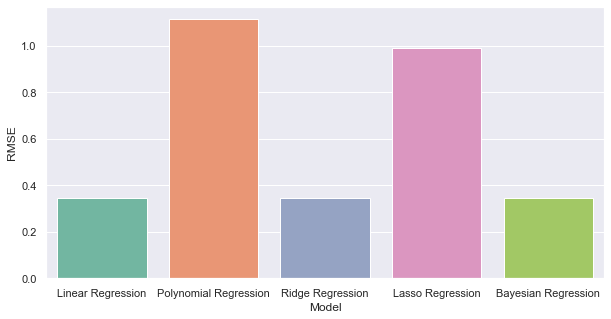

In [44]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='RMSE', data=df, palette = 'Set2')

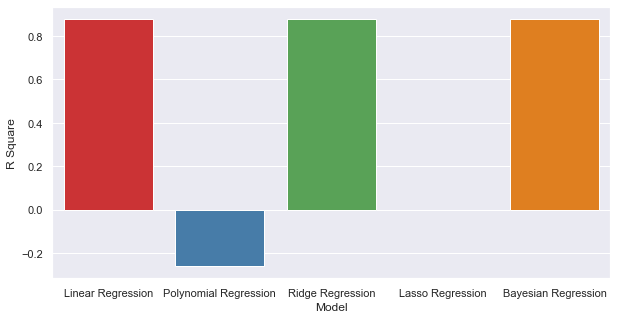

In [45]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R Square', data=df, palette = 'Set1')